# Analyse du dataset hybrid_deepseek-v3.2

Notebook de synthese pour `hybrid_deepseek-v3.2.jsonl`.
Objectif: explorer le schema, la qualite et les distributions principales.


In [47]:
import json
from pathlib import Path
import pandas as pd

path = Path('hybrid_deepseek-v3.2.jsonl')
rows = [json.loads(line) for line in path.open()]
df = pd.DataFrame(rows)

df.head()


,prompt,title,reference,h_score,h_score_cat,pageid,revid,description,categories,task,creativity_level,length_words,blueprint,quality_checks
0,Grade level: 10th grade\nLearning objectives:\...,Anjaana Anjaani,## Plot\n\nAkash lives in New York City; he ha...,1.610227e+06,5,24511133,1169136360,2010 film by Siddharth Anand,"[2010 films, 2010 romantic comedy-drama films,...",LESSON_PLAN,FACTUAL,100,{'scenario_hook': 'A movie enthusiast wants a ...,"{'mentions_wikipedia': False, 'has_measurable_..."
1,Hi! I want a 10‑post social media thread (each...,I Do Do,## Plot The episode starts where the previous ...,1.598629e+06,5,27428630,1131344678,NaN,"[2010 American television episodes, 30 Rock (s...",SOCIAL_MEDIA_THREAD,VERY_CREATIVE,100,{'scenario_hook': 'I’m writing a brief comedic...,"{'mentions_wikipedia': False, 'has_measurable_..."
2,Please generate an official press release anno...,Bramble shark,The bramble shark (Echinorhinus brucus) is one...,1.635291e+06,5,2964418,1168691176,Species of shark,"[Echinorhinidae, Fauna of Kiribati, Fauna of S...",PRESS_RELEASE,HYBRID,100,{'scenario_hook': 'A marine research team in t...,"{'mentions_wikipedia': False, 'has_measurable_..."
3,"Hey, I’m preparing a seasonal menu for my rest...",Phallus indusiatus,"Phallus indusiatus, commonly called the bamboo...",1.632299e+06,5,3692798,1170477155,Widespread species of stinkhorn fungus,"[Chinese edible mushrooms, Edible fungi, Fungi...",SOCIAL_MEDIA_THREAD,VERY_CREATIVE,100,{'scenario_hook': 'I’m preparing a seasonal me...,"{'mentions_wikipedia': False, 'has_measurable_..."
4,I want a concise timeline of Judy Johnson's ba...,Judy Johnson,### The 1930s The onset of the Great Depressio...,1.613577e+06,5,696764,1173140147,"American baseball player, manager, and scout","[1899 births, 1989 deaths, 20th-century Africa...",SOCIAL_MEDIA_THREAD,HYBRID,100,{'scenario_hook': 'A college professor researc...,"{'mentions_wikipedia': False, 'has_measurable_..."


## Schema et qualite basique


In [48]:
df.shape


(48, 14)

In [49]:
df.columns


Index(['prompt', 'title', 'reference', 'h_score', 'h_score_cat', 'pageid',
       'revid', 'description', 'categories', 'task', 'creativity_level',
       'length_words', 'blueprint', 'quality_checks'],
      dtype='object')

In [50]:
missing = df.isna().sum().sort_values(ascending=False)
missing


description         6
prompt              0
title               0
reference           0
h_score             0
h_score_cat         0
pageid              0
revid               0
categories          0
task                0
creativity_level    0
length_words        0
blueprint           0
quality_checks      0
dtype: int64

## Distributions principales


In [51]:
df['task'].value_counts()


task
SOCIAL_MEDIA_THREAD       13
PRESS_RELEASE             10
NEWS_ARTICLE              10
LESSON_PLAN                8
INTERNAL_BRIEFING_MEMO     3
INTERVIEW                  3
STUDY_GUIDE                1
Name: count, dtype: int64

In [70]:
#affiche les prompt avec la tache social media thread
display(df[df["task"].str.upper() == "SOCIAL_MEDIA_THREAD"][["prompt", "title", "task"]])

,prompt,title,task
1,Hi! I want a 10‑post social media thread (each...,I Do Do,SOCIAL_MEDIA_THREAD
3,"Hey, I’m preparing a seasonal menu for my rest...",Phallus indusiatus,SOCIAL_MEDIA_THREAD
4,I want a concise timeline of Judy Johnson's ba...,Judy Johnson,SOCIAL_MEDIA_THREAD
9,"Hey ChatGPT, I'd like a 10‑post social media t...",2007 Major League Baseball All-Star Game,SOCIAL_MEDIA_THREAD
12,Create a 10‑post social media educational thre...,The Hockey Sweater,SOCIAL_MEDIA_THREAD
15,Hey ChatGPT! I just finished the second campai...,The Lord of the Rings: The Battle for Middle-e...,SOCIAL_MEDIA_THREAD
17,Generate a social media thread for a conservat...,Independent Women's Forum,SOCIAL_MEDIA_THREAD
22,I need a concise overview of Luan Da’s backgro...,Luan Da,SOCIAL_MEDIA_THREAD
30,Please create an educational thread on Maurice...,Richard Riot,SOCIAL_MEDIA_THREAD
34,Create a short story prompt for writers that e...,The Blip,SOCIAL_MEDIA_THREAD


In [53]:
df['creativity_level'].value_counts()


creativity_level
FACTUAL          27
VERY_CREATIVE    11
HYBRID           10
Name: count, dtype: int64

In [54]:
df['h_score_cat'].value_counts().sort_index()


h_score_cat
5     6
6    25
7    13
8     4
Name: count, dtype: int64

In [55]:
df['h_score'].describe()


count    4.800000e+01
mean     1.684396e+06
std      5.334680e+04
min      1.598629e+06
25%      1.652966e+06
50%      1.673426e+06
75%      1.702947e+06
max      1.845264e+06
Name: h_score, dtype: float64

In [56]:
df['length_words'].describe()


count     48.0
mean     100.0
std        0.0
min      100.0
25%      100.0
50%      100.0
75%      100.0
max      100.0
Name: length_words, dtype: float64

## Categories (top 15)


In [57]:
df['categories'].explode().value_counts().head(15)


categories
Year of birth unknown                              3
Robert Moses projects                              2
Films shot in New York City                        2
Natural disasters in New York City                 2
Xbox 360 games                                     2
Billboard Hot 100 number-one singles               2
New York City Designated Landmarks in Manhattan    2
Multiplayer and single-player video games          2
Civic Center, Manhattan                            2
Number-one singles in Australia                    2
Video games developed in the United States         2
TV Tokyo original programming                      1
Tokyopop titles                                    1
Slice of life anime and manga                      1
Winner of Kodansha Manga Award (Shōnen)            1
Name: count, dtype: int64

## Quality checks


In [58]:
qc = pd.DataFrame(df['quality_checks'].tolist())
qc.mean().sort_index()


has_measurable_constraints    1.0
includes_subject              1.0
mentions_wikipedia            0.0
natural_sounding              1.0
dtype: float64

## Task x Creativity


In [59]:
pd.crosstab(df['task'], df['creativity_level'])


creativity_level,FACTUAL,HYBRID,VERY_CREATIVE
task,,,
INTERNAL_BRIEFING_MEMO,1,2,0
INTERVIEW,2,1,0
LESSON_PLAN,6,1,1
NEWS_ARTICLE,6,1,3
PRESS_RELEASE,5,2,3
SOCIAL_MEDIA_THREAD,7,2,4
STUDY_GUIDE,0,1,0


## Graphiques


In [60]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='whitegrid')


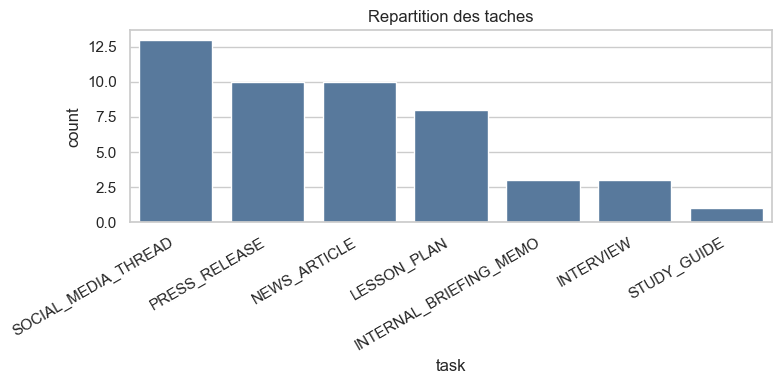

In [61]:
# Repartition des taches
plt.figure(figsize=(8, 4))
task_counts = df['task'].value_counts()
sns.barplot(x=task_counts.index, y=task_counts.values, color='#4C78A8')
plt.xticks(rotation=30, ha='right')
plt.ylabel('count')
plt.title('Repartition des taches')
plt.tight_layout()
plt.show()


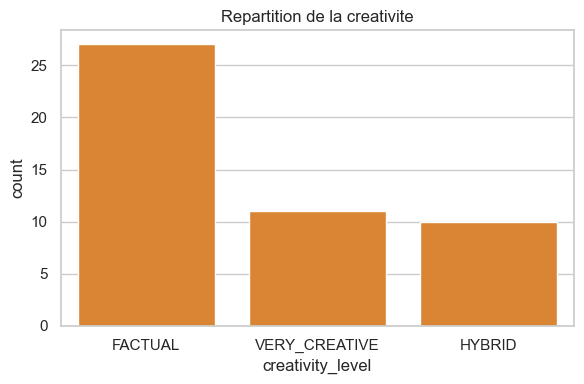

In [62]:
# Repartition de la creativite
plt.figure(figsize=(6, 4))
creativity_counts = df['creativity_level'].value_counts()
sns.barplot(x=creativity_counts.index, y=creativity_counts.values, color='#F58518')
plt.ylabel('count')
plt.title('Repartition de la creativite')
plt.tight_layout()
plt.show()


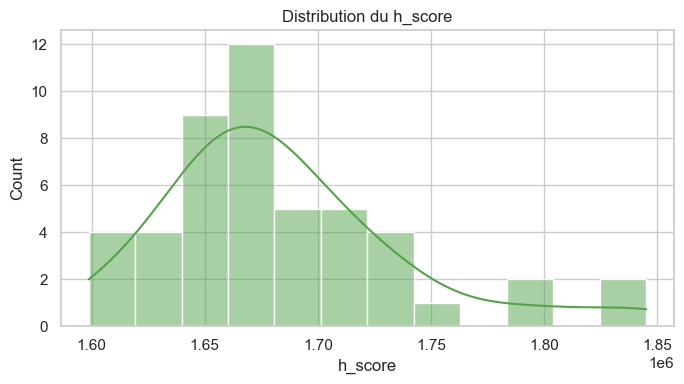

In [63]:
# Distribution du h_score
plt.figure(figsize=(7, 4))
sns.histplot(df['h_score'], bins=12, kde=True, color='#54A24B')
plt.xlabel('h_score')
plt.title('Distribution du h_score')
plt.tight_layout()
plt.show()


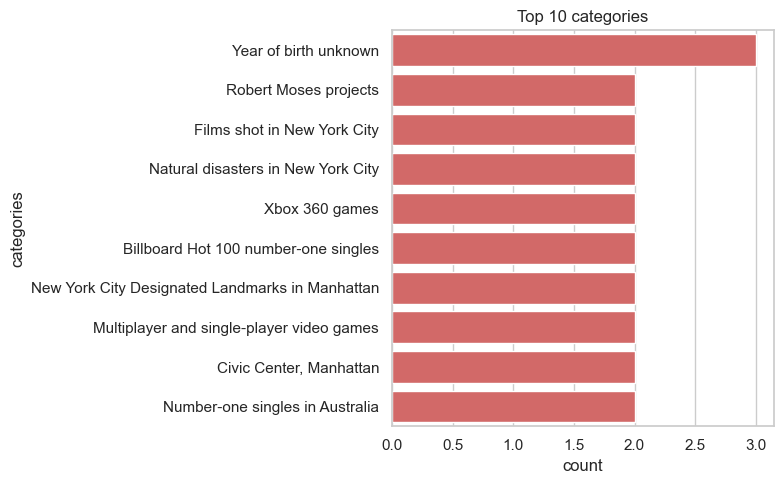

In [64]:
# Categories les plus frequentes
plt.figure(figsize=(8, 5))
top_cats = df['categories'].explode().value_counts().head(10)
sns.barplot(x=top_cats.values, y=top_cats.index, color='#E45756')
plt.xlabel('count')
plt.title('Top 10 categories')
plt.tight_layout()
plt.show()


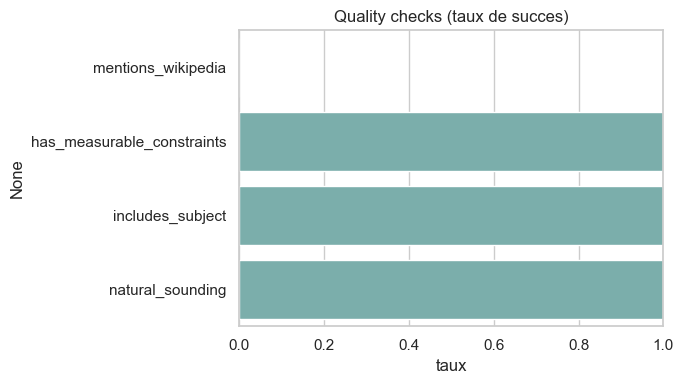

In [65]:
# Quality checks (taux de succes)
plt.figure(figsize=(7, 4))
qc = pd.DataFrame(df['quality_checks'].tolist())
qc_mean = qc.mean().sort_values()
sns.barplot(x=qc_mean.values, y=qc_mean.index, color='#72B7B2')
plt.xlim(0, 1)
plt.xlabel('taux')
plt.title('Quality checks (taux de succes)')
plt.tight_layout()
plt.show()


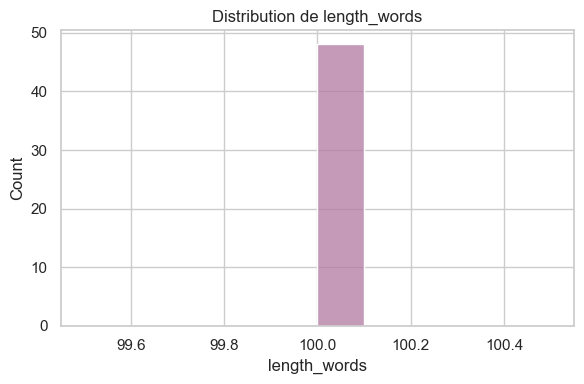

In [66]:
# Distribution de length_words
plt.figure(figsize=(6, 4))
sns.histplot(df['length_words'], bins=10, kde=False, color='#B279A2')
plt.xlabel('length_words')
plt.title('Distribution de length_words')
plt.tight_layout()
plt.show()


## Analyse de realisme des prompts


Heuristiques simples pour estimer si un prompt ressemble a une demande realiste. On marque des signaux 'peu realistes' (contraintes extremement specifiques, incoherences, formatage trop rigide, etc.).


In [67]:
import re
from collections import Counter

def analyze_prompt_realism(prompt: str):
    flags = []
    p = prompt.lower()
    # Indicateurs de contraintes tres strictes / formatage artificiel
    if re.search(r'exactly|exactement', p):
        flags.append('exact_counts')
    if re.search(r'\d+\s*(words|word|mots|chars|characters|char)', p):
        flags.append('explicit_length')
    if re.search(r'hashtags?|#\w+', p):
        flags.append('social_media_format')
    if re.search(r'use\s+only|no\s+\w+', p):
        flags.append('hard_restrictions')
    if re.search(r'json|xml|markdown|table', p):
        flags.append('strict_format')
    # Indicateurs de scenario potentiellement artificiel
    if re.search(r'improv|sketch', p):
        flags.append('sketch_scenario')
    if re.search(r'press release|communique', p):
        flags.append('press_release')
    # Indicateurs de realisme (ancrage contextuel)
    realistic = []
    if re.search(r'grade level|classe|enseignant|students?', p):
        realistic.append('education_context')
    if re.search(r'deadline|for internal use|confidential', p):
        realistic.append('business_context')
    if re.search(r'project|team|stakeholder', p):
        realistic.append('project_context')
    return flags, realistic

analysis = df['prompt'].apply(analyze_prompt_realism)
df['realism_flags'] = analysis.apply(lambda x: x[0])
df['realism_signals'] = analysis.apply(lambda x: x[1])

# Score simple: plus de flags = moins realiste
df['realism_flag_count'] = df['realism_flags'].apply(len)

df[['prompt','realism_flag_count','realism_flags','realism_signals']].head()


,prompt,realism_flag_count,realism_flags,realism_signals
0,Grade level: 10th grade\nLearning objectives:\...,0,[],[]
1,Hi! I want a 10‑post social media thread (each...,0,[],[]
2,Please generate an official press release anno...,0,[],[]
3,"Hey, I’m preparing a seasonal menu for my rest...",0,[],[]
4,I want a concise timeline of Judy Johnson's ba...,0,[],[]


In [68]:
# Distribution des flags
flag_counts = Counter(f for flags in df['realism_flags'] for f in flags)
flag_counts


Counter()

In [69]:
# Prompts avec le plus de signaux 'peu realistes'
df.sort_values('realism_flag_count', ascending=False)
  .loc[:, ['title','task','realism_flag_count','realism_flags','prompt']]
  .head(8)


IndentationError: unexpected indent (3432979473.py, line 3)

In [ ]:
# Prompts avec le plus de signaux 'realistes'
df.assign(realism_signal_count=df['realism_signals'].apply(len))
  .sort_values('realism_signal_count', ascending=False)
  .loc[:, ['title','task','realism_signal_count','realism_signals','prompt']]
  .head(8)


In [ ]:
# Visuel: nombre de flags par tache
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='task', y='realism_flag_count', color='#9ecae1')
plt.xticks(rotation=30, ha='right')
plt.title('Realism flags par tache (heuristique)')
plt.tight_layout()
plt.show()


In [71]:
import requests
import json

response = requests.get(
  url="https://openrouter.ai/api/v1/key",
  headers={
    "Authorization": f"Bearer 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"
  }
)

print(json.dumps(response.json(), indent=2))


{
  "data": {
    "label": "sk-or-v1-103...859",
    "is_provisioning_key": false,
    "limit": null,
    "limit_reset": null,
    "limit_remaining": null,
    "include_byok_in_limit": false,
    "usage": 144.5290342597417,
    "usage_daily": 0,
    "usage_weekly": 7.689158401,
    "usage_monthly": 0,
    "byok_usage": 6.777736234,
    "byok_usage_daily": 0,
    "byok_usage_weekly": 6.722165084,
    "byok_usage_monthly": 0,
    "is_free_tier": false,
    "expires_at": null,
    "rate_limit": {
      "requests": -1,
      "interval": "10s",
      "note": "This field is deprecated and safe to ignore."
    }
  }
}
